In [2]:
import tensorflow as tf

In [3]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [4]:
tf.random.set_seed(1)
np.random.seed(1)

In [5]:
X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )

In [6]:
X.shape

(200, 2)

In [7]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [8]:
y = np.ones(   len(X)    ) 

In [9]:
y.shape

(200,)

In [10]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
y[  X[:, 0] * X[:, 1] < 0   ] = 0

In [12]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [13]:
print(y.shape)
print(X.shape)

(200,)
(200, 2)


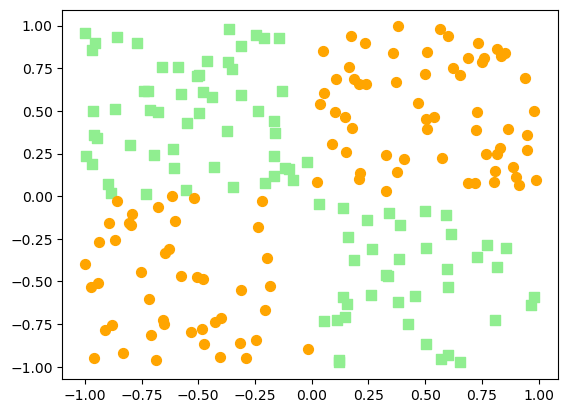

In [14]:
plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()

In [15]:
X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]

logistic regression

In [16]:
model = tf.keras.Sequential()
model.add(
             tf.keras.layers.Dense(
                                      units=1,
                                      input_shape=(2, ),
                                      activation='sigmoid'
                                  )

)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
                 optimizer=tf.keras.optimizers.SGD(),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]

             )

In [19]:
history = model.fit(
                       X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       epochs=200,
                       batch_size=2,
                       verbose=1
                   )

Epoch 1/200
50/50 [==============================] - 1s 9ms/step - loss: 0.8157 - binary_accuracy: 0.4600 - val_loss: 0.8071 - val_binary_accuracy: 0.4800
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.8068 - binary_accuracy: 0.4600 - val_loss: 0.7986 - val_binary_accuracy: 0.4800
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7984 - binary_accuracy: 0.4500 - val_loss: 0.7906 - val_binary_accuracy: 0.4800
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7905 - binary_accuracy: 0.4600 - val_loss: 0.7830 - val_binary_accuracy: 0.4800
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7832 - binary_accuracy: 0.4500 - val_loss: 0.7760 - val_binary_accuracy: 0.4900
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7762 - binary_accuracy: 0.4500 - val_loss: 0.7693 - val_binary_accuracy: 0.4900
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - los

50/50 [==============================] - 0s 3ms/step - loss: 0.6879 - binary_accuracy: 0.5100 - val_loss: 0.6818 - val_binary_accuracy: 0.6100
Epoch 54/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5500 - val_loss: 0.6816 - val_binary_accuracy: 0.6100
Epoch 55/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6877 - binary_accuracy: 0.5500 - val_loss: 0.6814 - val_binary_accuracy: 0.6200
Epoch 56/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6875 - binary_accuracy: 0.5400 - val_loss: 0.6813 - val_binary_accuracy: 0.6300
Epoch 57/200
50/50 [==============================] - 0s 4ms/step - loss: 0.6873 - binary_accuracy: 0.5700 - val_loss: 0.6811 - val_binary_accuracy: 0.6300
Epoch 58/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6874 - binary_accuracy: 0.5900 - val_loss: 0.6810 - val_binary_accuracy: 0.6300
Epoch 59/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6

50/50 [==============================] - 0s 4ms/step - loss: 0.6858 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 108/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 109/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6100 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - los

50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 158/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 159/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 160/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 161/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 162/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6500 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 163/200
50/50 [==============================] - 0s 3ms/step - los

In [20]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


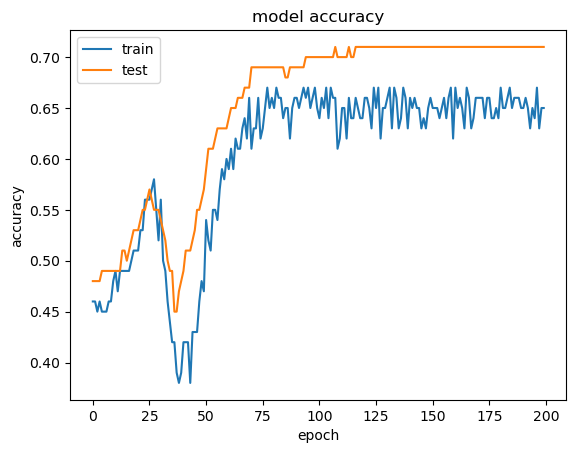

In [21]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

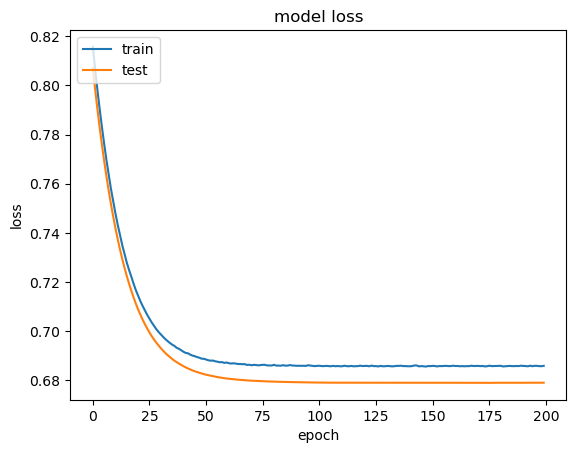

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


DNN

In [23]:
model = tf.keras.Sequential()
model.add(  tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))
model.add(  tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
                optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[   tf.keras.metrics.BinaryAccuracy()   ]

             )

In [26]:
hist = model.fit(
                    X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs=200,
                    batch_size=2,
                    verbose=1

                )

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 0.7210 - binary_accuracy: 0.4800 - val_loss: 0.7159 - val_binary_accuracy: 0.5100
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7105 - binary_accuracy: 0.3600 - val_loss: 0.7094 - val_binary_accuracy: 0.4000
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7064 - binary_accuracy: 0.3900 - val_loss: 0.7062 - val_binary_accuracy: 0.3600
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7037 - binary_accuracy: 0.3800 - val_loss: 0.7028 - val_binary_accuracy: 0.3400
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7002 - binary_accuracy: 0.3900 - val_loss: 0.6987 - val_binary_accuracy: 0.4200
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6974 - binary_accuracy: 0.4400 - val_loss: 0.6960 - val_binary_accuracy: 0.4600
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - los

50/50 [==============================] - 0s 4ms/step - loss: 0.5908 - binary_accuracy: 0.7200 - val_loss: 0.5833 - val_binary_accuracy: 0.7700
Epoch 54/200
50/50 [==============================] - 0s 4ms/step - loss: 0.5861 - binary_accuracy: 0.7100 - val_loss: 0.5801 - val_binary_accuracy: 0.7500
Epoch 55/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5812 - binary_accuracy: 0.7200 - val_loss: 0.5727 - val_binary_accuracy: 0.7600
Epoch 56/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5747 - binary_accuracy: 0.7000 - val_loss: 0.5666 - val_binary_accuracy: 0.7600
Epoch 57/200
50/50 [==============================] - 0s 4ms/step - loss: 0.5687 - binary_accuracy: 0.7300 - val_loss: 0.5608 - val_binary_accuracy: 0.7600
Epoch 58/200
50/50 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_accuracy: 0.7400 - val_loss: 0.5543 - val_binary_accuracy: 0.7600
Epoch 59/200
50/50 [==============================] - 0s 4ms/step - loss: 0.5

50/50 [==============================] - 0s 5ms/step - loss: 0.1365 - binary_accuracy: 0.9900 - val_loss: 0.1738 - val_binary_accuracy: 0.9800
Epoch 106/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1303 - binary_accuracy: 0.9900 - val_loss: 0.1698 - val_binary_accuracy: 0.9700
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1306 - binary_accuracy: 0.9900 - val_loss: 0.1720 - val_binary_accuracy: 0.9500
Epoch 108/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1254 - binary_accuracy: 1.0000 - val_loss: 0.1697 - val_binary_accuracy: 0.9700
Epoch 109/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1250 - binary_accuracy: 0.9800 - val_loss: 0.1734 - val_binary_accuracy: 0.9200
Epoch 110/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1224 - binary_accuracy: 0.9900 - val_loss: 0.1685 - val_binary_accuracy: 0.9400
Epoch 111/200
50/50 [==============================] - 0s 5ms/step - los

50/50 [==============================] - 0s 3ms/step - loss: 0.0540 - binary_accuracy: 1.0000 - val_loss: 0.1314 - val_binary_accuracy: 0.9400
Epoch 158/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0556 - binary_accuracy: 1.0000 - val_loss: 0.1247 - val_binary_accuracy: 0.9500
Epoch 159/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0532 - binary_accuracy: 0.9900 - val_loss: 0.1229 - val_binary_accuracy: 0.9800
Epoch 160/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0525 - binary_accuracy: 1.0000 - val_loss: 0.1274 - val_binary_accuracy: 0.9400
Epoch 161/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0500 - binary_accuracy: 1.0000 - val_loss: 0.1215 - val_binary_accuracy: 0.9800
Epoch 162/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0547 - binary_accuracy: 1.0000 - val_loss: 0.1231 - val_binary_accuracy: 0.9400
Epoch 163/200
50/50 [==============================] - 0s 3ms/step - los

In [27]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


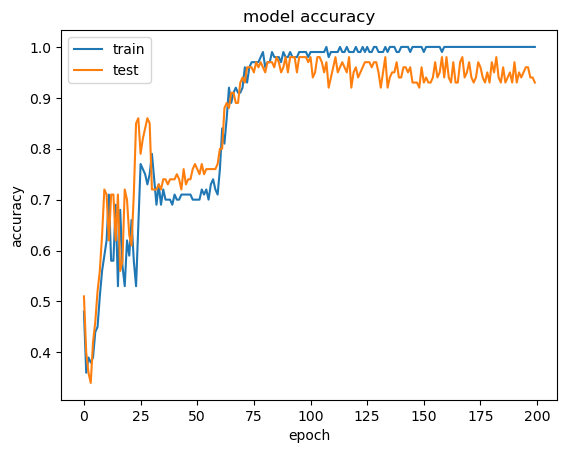

In [28]:
history = hist


# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

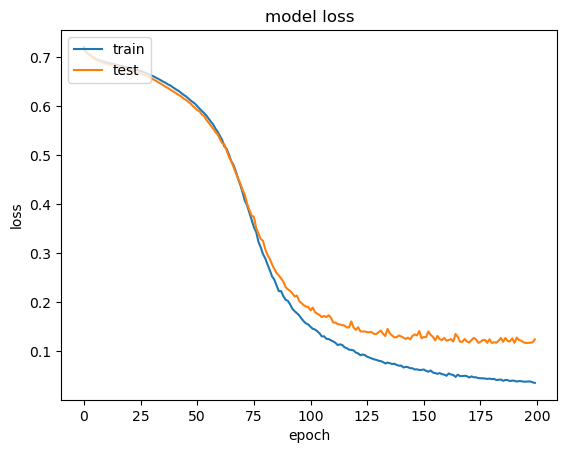

In [29]:
history = hist

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.save('modelXOR.h5')